# Import des packages


In [2]:
import pandas as pd
from baselines.feature_selection import *
from sklearn.model_selection import train_test_split
import sklearn_relief as sr
import matplotlib.pyplot as plt


/home/amine/anaconda3/lib/python3.10/site-packages/mass_ts/_mass_ts.py:17: UserWarning: GPU support will not work. You must pip install mass-ts[gpu].
  warnings.warn(


### Definition du chemin


In [3]:
data_path = '/home/amine/ensea/chonomp/data/dgp/monotonic/returns'
df = pd.read_csv(data_path+'/'+'data_0.csv', header=0)

In [4]:
df

,X1,X10,X100,X1000,X101,X102,X103,X104,X105,X106,...,X990,X991,X992,X993,X994,X995,X996,X997,X998,X999
0,1.084128,1.779866,0.326261,0.417288,2.987508,-1.654588,-1.316533,-2.279031,-0.712055,-0.259796,...,-1.529283,-1.287435,-0.997313,2.265928,1.562003,3.285224,1.395267,-1.433252,-1.475528,0.544803
1,1.303468,1.885994,-0.498215,0.045994,2.888910,-1.392550,-1.021192,-2.532860,0.054023,-0.477398,...,-1.357066,-0.422924,-0.573439,2.131759,1.496654,3.633119,1.187130,-1.420846,-2.845585,0.370167
2,0.796008,1.865968,-0.512441,0.284996,3.240311,-1.710403,-1.042233,-1.431688,-0.453045,-0.786131,...,-1.577796,-0.767166,-0.412088,2.168564,1.214282,3.425217,1.497186,-1.545745,-2.044041,0.625856
3,0.638713,2.388999,0.007913,0.811970,2.188223,-1.159725,-0.988585,-2.532824,-0.477264,-0.277778,...,-1.426975,-0.799399,-0.853609,1.740103,1.200686,3.344981,0.935929,-1.363788,-2.393697,1.310509
4,0.878618,1.807396,-0.282913,0.130670,3.195962,-1.700142,-1.006774,-2.500862,-0.798945,-0.599874,...,-1.083964,-0.558930,-0.777188,1.268142,1.186377,3.596278,2.186966,-0.737285,-2.064640,0.672431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.312628,1.692048,-0.348197,0.308865,3.065308,-1.531612,-0.699649,-2.535424,-1.013605,0.027405,...,-1.796728,-0.402893,-0.605640,1.683052,1.572796,3.289872,1.584220,-1.799673,-1.895541,0.605738
496,1.432869,1.714216,-0.210079,-0.165811,3.230096,-1.908259,-1.196532,-2.344040,-0.778282,-0.285054,...,-1.045479,-0.769174,-0.127737,1.862849,1.468545,3.031830,1.654295,-1.011261,-2.431744,0.424425
497,0.755787,1.748905,-0.031567,-0.065946,3.325115,-1.983799,-0.800221,-2.741254,-0.320509,-0.421571,...,-1.455034,-0.781396,-0.701983,2.145285,1.843467,3.161452,2.070167,-1.358269,-2.134870,0.148163
498,1.204493,1.989691,-0.480980,0.986855,3.230426,-1.445274,-0.350630,-2.041034,-0.709305,-0.513814,...,-0.912861,-0.554875,-1.409890,1.590547,1.428199,2.865608,1.307437,-1.265509,-2.723575,0.164814


## Utilisation du filtre Rrelieff

### Algorithme:
Le programme ReliefF sélectionne de manière aléatoire une instance R i , puis recherche k de ses voisins les plus proches de la même classe, appelés "nearest hits" H j , ainsi que k voisins les plus proches de classes différentes, appelés "nearest misses" M j . Il met à jour l'estimation de la qualité W [A] pour toutes les caractéristiques A en fonction de leurs valeurs pour R i, les hits H, et les misses M.


 set all weights W [A] := 0.0;
 for i := 1 to m do begin
    randomly select an instance R i ;
    find k nearest hits H j ;
    for each class C  = class(R i ) do
        from class C find k nearest misses M j (C);
  for A := 1 to a do
    W [A] := W [A] - k∑diff(A, R i , H j )/(m · k)+∑C !=class(R i )[ P(C)1−P(class(R i ))k∑j=1diff(A, R i , M j (C))]/(m · k);
   end;




Avec pour nles nominal attributes : diff(A,I1,I2)= 0 si valeur(A,I1)=valeur(A,I2) 1 sinon 
et pour les numerical attributes: diff(A,I1,I2)=abs(valeur(A,I1)-valeur(A,I2))/(max(A)-min(A)

In [5]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]


X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)
#r = sr.RReliefF(n_features = 20)
#r.fit_transform(X_train,y_train)
X_train=X_train.to_numpy()
y_train=y_train.to_numpy()
#print(r.fit_transform(X_train,y_train))


# Sliding window with lags 

### Prepare data vectorize 

In [6]:
import numpy as np
def prepare_data_vectorize(data, lags,target):
    y = data[target].iloc[lags:]
    indexes = y.index
    y = y.values
    window_X = [data.values[i:i+lags].reshape((-1,)) for i in range(len(data)-lags)]
    X = np.array(window_X)
    return X, y, indexes

In [7]:
data=df
lags=10
target=Y.name

In [8]:
prepare_data_vectorize(data,lags,target)

(array([[ 1.08412827,  1.77986601,  0.3262609 , ..., -1.20642022,
         -2.22555251,  0.12818437],
        [ 1.30346756,  1.88599447, -0.49821532, ..., -0.82043457,
         -2.09891782,  0.51283823],
        [ 0.79600812,  1.86596838, -0.51244109, ..., -2.25795925,
         -2.11097012,  0.63520636],
        ...,
        [ 0.81273222,  1.58513076,  0.03478529, ..., -1.01126142,
         -2.43174416,  0.42442462],
        [ 0.91934653,  2.21093036, -0.77947635, ..., -1.35826867,
         -2.13486993,  0.14816342],
        [ 1.21429709,  2.70133616, -0.33238068, ..., -1.26550912,
         -2.72357508,  0.16481415]]),
 array([ 5.12838226e-01,  6.35206362e-01, -3.48022181e-02,  6.06766629e-01,
         5.67067056e-01,  6.49735713e-01,  9.92840206e-02,  3.12047348e-01,
         5.87518031e-01,  4.51810276e-01,  9.27337107e-01, -2.98853803e-01,
         1.26965355e-01,  6.01000121e-01,  1.49521358e-01,  7.15155196e-01,
         5.10210162e-01,  5.90542754e-01,  1.56400981e-01,  4.9062419

### Vectore mask to columns pour selectionner les colonnes de notre dataframe


In [9]:

    def vector_mask_to_columns(mask, data):
        """
        Given a mask (a vector of boolean with True if a feature is selected and False otherwise),
        covering the vectorized feature space (aka, each columns at each lag up to the window size),
        extract each column for which at least one lag was selected by the FS method.
        
        Params:
            mask: 1D np.array of bool, at True if the given vectorized feature is selected, False otherwise.
            data: pd.DataFrame, the data in the original format.
        Returns:
            selected: list of str, the list of column names in the original dataframe that were selected
        """
        indexes = np.any(np.array(mask).reshape((-1,len(data.columns))), axis=0)
        selected = data.columns[indexes]
        selected=list(selected)
        return selected

In [10]:
random_mask = np.random.choice([True, False], size=1000)
data=df

In [11]:
vector_mask_to_columns(random_mask,data)

['X1',
 'X1000',
 'X101',
 'X102',
 'X104',
 'X105',
 'X108',
 'X109',
 'X111',
 'X112',
 'X113',
 'X114',
 'X117',
 'X119',
 'X12',
 'X123',
 'X124',
 'X131',
 'X133',
 'X137',
 'X138',
 'X140',
 'X143',
 'X144',
 'X146',
 'X15',
 'X154',
 'X155',
 'X157',
 'X158',
 'X16',
 'X160',
 'X163',
 'X165',
 'X169',
 'X171',
 'X175',
 'X176',
 'X18',
 'X181',
 'X182',
 'X186',
 'X187',
 'X19',
 'X192',
 'X193',
 'X194',
 'X196',
 'X197',
 'X198',
 'X199',
 'X20',
 'X202',
 'X203',
 'X204',
 'X205',
 'X21',
 'X215',
 'X218',
 'X220',
 'X221',
 'X224',
 'X229',
 'X232',
 'X236',
 'X237',
 'X238',
 'X239',
 'X241',
 'X243',
 'X244',
 'X245',
 'X247',
 'X248',
 'X249',
 'X250',
 'X252',
 'X253',
 'X256',
 'X257',
 'X259',
 'X26',
 'X260',
 'X262',
 'X264',
 'X265',
 'X269',
 'X27',
 'X270',
 'X271',
 'X272',
 'X276',
 'X277',
 'X283',
 'X284',
 'X286',
 'X287',
 'X289',
 'X29',
 'X290',
 'X291',
 'X292',
 'X293',
 'X294',
 'X298',
 'X299',
 'X3',
 'X300',
 'X305',
 'X307',
 'X31',
 'X311',
 'X316

### Tranform function

In [12]:
config = {
    'k': 10,  # The number of nearest neighbors to use per class (defaults to 10)
    'approx_decimals': 4,  # The number of decimals to approximate real values to
    'ramp': False,  # True to use the ramp-based distance function (defaults to False)
    'tdiff': 0,  # Only useful when `ramp=True`, minimum distance threshold
    'teq': 1,  # Only useful when `ramp=True`, maximum distance threshold
    'sigma': 1.0,  # Distance factor scaling hyper-parameter
    'num_features_to_select':4, # Number of features to select
    'lags':10
}

def transform(r, data):
        """Transform the input data.

        This method uses the computed weight vector to produce a new
        dataset exhibiting only the `self.n_features` best-ranked features.

        ARGUMENTS
        -----
        data: The input data to transform

        RETURN VALUE
        -----
        A matrix with the same number of rows as `data` and at most
        `n_features` columns.
        """
        n_features = np.round(
            data.shape[1] * r.n_features
        ).astype(np.int16) if r.n_features < 1 else r.n_features
        feat_indices = np.flip(np.argsort(r.w_), 0)[0:n_features]

        return feat_indices

# Apply Rrelieff 

In [13]:
def apply_Rrelieff(data,i,target):
    X,y,_=prepare_data_vectorize(data,config['lags'],target)
    X_df=pd.DataFrame(X,columns=[f'lag_{i}' for i in range(1,X.shape[1]+1)])
    num_features_to_select=config['num_features_to_select']
    rrelief_instance = sr.RReliefF(n_features=i)
    rrelief_instance.fit(X,y)
    selected_feature_indices = transform(rrelief_instance, X_df)
    vector_mask = [name in selected_feature_indices for name in range(len(X_df.columns))]
    selected_feature_names=vector_mask_to_columns(vector_mask,data)
    return selected_feature_names

# Open dataset and ground truth selectionne les targets possible de notre dataset

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import networkx as nx
def standardize_df(df):
    return (df - df.mean(axis=0)) / df.std(axis=0)
# extractor functions
def node_to_tuple(node):
    lag, variable = node[1:].split(".")
    return (variable, lag)

def get_all_parents(graph, target):
    if "L0." + target in graph.nodes:
        l = list(graph.predecessors("L0." + target))
        return list(map(node_to_tuple, l))
    else:
        return list(graph.predecessors(target))

def get_all_ancestors(graph, target):
    if "L0." + target in graph.nodes:
        l = list(nx.ancestors(graph, "L0." + target))
        return list(map(node_to_tuple, l))
    else:
        return list(nx.ancestors(graph, target))

def get_all_connected(graph, target):
    if "L0." + target in graph.nodes:
        l = list(nx.node_connected_component(graph.to_undirected(), "L0." + target))
        return list(map(node_to_tuple, l))
    else:
        return list(nx.node_connected_component(graph.to_undirected(), target))
     
def open_dataset_and_ground_truth(dataset_name: str,
                                  filename: str,
                                  cause_extraction="parents",
                                  rootdir="/home/amine/ensea/chonomp",
                                  compute_window_causal_graph=False,
                                  window_size="max_direct"):
    """
    Open a file in a dataset family, where the ground truth is known:
    Params:
     - dataset_name: name of the dataset family
     - filename: name of the file containing the MTS instance
     (note: /data/<dataset_name>/<filename> is the complete path, with filename including the extension)
     - cause_extraction (optional): the method to compute the relevant variables
     - rootdir (optional): string indicating the root repository
     - computed_window_causal_graph (optional): bool set to True to compute window causal graph
     - window_size (optional): lag selection strategy for the window causal graph. Default is "max_direct" which takes the maximal lag of a cause.
    Returns:
     - df: the dataframe containing the MTS
     - var_names: the list of attribute names that can be forecasting target
     - causes_attributes_dict: dictionary associating each attribute to the list of its relevant predictors.
     - lagged_attributes_dict: dictionary associating each attribute to the list of its relevant predictors, containing lag information.
     - (optional) if compute_window_causal_graph is True, return the window causal graph as a networkx Digraph object
    """

    if dataset_name[:11] == "SynthNonlin":
        df = pd.read_csv(rootdir + "/data/" + dataset_name + "/" + filename)
        df = df[df.columns[1:]]

    elif dataset_name[:4] == "fMRI":
        df = pd.read_csv(rootdir + "/data/" + dataset_name + "/" + filename)
        df.columns = [str(i) for i in df.columns]

    elif dataset_name[:10] == "FinanceCPT":
        df = pd.read_csv(rootdir + "/data/" + dataset_name + "/" + filename, header=None)
        df.columns = [str(i) for i in df.columns]

    elif dataset_name[:18] == "TestCLIM_N-5_T-250":
        df = pd.read_csv(rootdir + "/data/" + dataset_name + "/" + filename, header=None, sep=" ")
        df.columns = [str(i) for i in df.columns]
        
    elif dataset_name=="VARProcess/returns":
        df = pd.read_csv(rootdir + "/data/" + dataset_name + "/" + filename)
        df.columns = [str(i) for i in df.columns]
    elif dataset_name=="VARProcessNoCorr/returns":
        df = pd.read_csv(rootdir + "/data/" + dataset_name + "/" + filename)
        df.columns = [str(i) for i in df.columns]
    elif dataset_name=="VARLarge/returns":
        df = pd.read_csv(rootdir + "/data/" + dataset_name + "/" + filename)
        df.columns = [str(i) for i in df.columns]
    elif dataset_name=="VARSmall/returns":
        df = pd.read_csv(rootdir + "/data/" + dataset_name + "/" + filename)
        df.columns = [str(i) for i in df.columns]
    elif dataset_name=="VARVaried/returns":
        df = pd.read_csv(rootdir + "/data/" + dataset_name + "/" + filename)
        df.columns = [str(i) for i in df.columns]
    elif dataset_name=="dgp/piecewise_linear/returns":
        df = pd.read_csv(rootdir + "/data/" + dataset_name + "/" + filename)
        df.columns = [str(i) for i in df.columns]
    elif dataset_name=="dgp/monotonic/returns":
        df = pd.read_csv(rootdir + "/data/" + dataset_name + "/" + filename)
        df.columns = [str(i) for i in df.columns]
    elif dataset_name=="dgp/trigonometric/returns":
        df = pd.read_csv(rootdir + "/data/" + dataset_name + "/" + filename)
        df.columns = [str(i) for i in df.columns]
    elif dataset_name=="wikipediaMathEssencials/returns":
        df = pd.read_csv(rootdir + "/data/" + dataset_name + "/" + filename)
        df.columns = [str(i) for i in df.columns]
    elif dataset_name=="Appliances":
        df = pd.read_csv(rootdir + "/data/" + dataset_name + "/" + filename)
        df.columns = [str(i) for i in df.columns]
    elif dataset_name=="AusMacro":
        df = pd.read_csv(rootdir + "/data/" + dataset_name + "/" + filename)
        df = df[df.columns[1:]]
        df.columns = [str(i) for i in df.columns]
    elif dataset_name=="AusMeteo":
        df = pd.read_csv(rootdir + "/data/" + dataset_name + "/" + filename)
        df.columns = [str(i) for i in df.columns]
    else:
        raise Exception("Dataset specified in config file is not implemented")

    var_names = list(df.columns)
    
    df = standardize_df(df)

    if dataset_name[:11] == "SynthNonlin":
        if dataset_name == "SynthNonlin/7ts2h":
            ground_truth_parents = defaultdict(list)
            ground_truth_lags = 10  # could be anything since we don't care about lags in this project
            ground_truth_parents["A"] = [("D", 1), ("A", 1)] #+ [("B", i) for i in range(1, ground_truth_lags + 1)]
            ground_truth_parents["D"] = [("H", 1), ("D", 1)] #+ [("E", i) for i in range(1, ground_truth_lags + 1)]
            ground_truth_parents["H"] = [("C", 1), ("H", 1)]
            ground_truth_parents["C"] = [("C", 1)]
            ground_truth_parents["F"] = [("C", 1), ("F", 1)]
            ground_truth_parents["B"] = [("F", 1), ("B", 1)] #+ [("A", i) for i in range(1, ground_truth_lags + 1)]
            ground_truth_parents["E"] = [("B", 1), ("E", 1)] #+ [("D", i) for i in range(1, ground_truth_lags + 1)]
        else:
            raise Exception("Dataset specified in argument is not implemented")

    elif dataset_name[:4] == "fMRI":
        index = filename[10:]
        index = index[:-4]
        g_truth_name = "fMRI_processed_by_Nauta/ground_truth/sim" + index + "_gt_processed.csv"

        df_truth = pd.read_csv(rootdir + "/data/" + g_truth_name, header=None, sep=",")
        ground_truth_parents = defaultdict(list)
        ground_truth_lags = 0
        for cause, effect, lag in df_truth.values:
            ground_truth_parents[str(effect)].append((str(cause), lag))
            ground_truth_lags = max(ground_truth_lags, lag)

    elif dataset_name[:10] == "FinanceCPT":

        g_truth_name = "FinanceCPT/ground_truth/" + filename[:filename.find("_returns")] + ".csv"
        df_truth = pd.read_csv(rootdir + "/data/" + g_truth_name, header=None, sep=",")
        ground_truth_parents = defaultdict(list)
        ground_truth_lags = 0
        for cause, effect, lag in df_truth.values:
            ground_truth_parents[str(effect)].append((str(cause), lag))
            ground_truth_lags = max(ground_truth_lags, lag)

    elif dataset_name[:18] == "TestCLIM_N-5_T-250":
        g_truth_name = "TestCLIM_N-5_T-250/estimated_ground_truth/" + filename
        df_truth = pd.read_csv(rootdir + "/data/" + g_truth_name, header=None, sep=",")
        ground_truth_parents = defaultdict(list)
        ground_truth_lags = 2
        for cause, effect in df_truth.values:
            ground_truth_parents[str(effect)].append((str(cause), 1))
            ground_truth_parents[str(effect)].append((str(cause), 2))
    
    elif dataset_name=="VARProcess/returns":
        g_truth_name = "VARProcess/ground_truths/"+filename
        df_truth = pd.read_csv(rootdir + "/data/" + g_truth_name, header=None, sep=",")
        ground_truth_parents = defaultdict(list)
        ground_truth_lags = 5
        for cause, effect, lag in df_truth.values:
            ground_truth_parents[str(effect)].append((str(cause), lag))
            
    elif dataset_name=="VARProcessNoCorr/returns":
        g_truth_name = "VARProcessNoCorr/ground_truths/"+filename
        df_truth = pd.read_csv(rootdir + "/data/" + g_truth_name, header=None, sep=",")
        ground_truth_parents = defaultdict(list)
        ground_truth_lags = 5
        for cause, effect, lag in df_truth.values:
            ground_truth_parents[str(effect)].append((str(cause), lag))
            
    elif dataset_name=="VARLarge/returns":
        g_truth_name = "VARLarge/ground_truths/"+filename
        df_truth = pd.read_csv(rootdir + "/data/" + g_truth_name, header=None, sep=",")
        ground_truth_parents = defaultdict(list)
        ground_truth_lags = 5
        for cause, effect, lag in df_truth.values:
            ground_truth_parents[str(effect)].append((str(cause), lag))
    
    elif dataset_name=="VARSmall/returns":
        g_truth_name = "VARSmall/ground_truths/"+filename
        df_truth = pd.read_csv(rootdir + "/data/" + g_truth_name, header=None, sep=",")
        ground_truth_parents = defaultdict(list)
        ground_truth_lags = 5
        for cause, effect, lag in df_truth.values:
            ground_truth_parents[str(effect)].append((str(cause), lag))
            
    elif dataset_name=="VARVaried/returns":
        g_truth_name = "VARVaried/ground_truths/"+filename
        df_truth = pd.read_csv(rootdir + "/data/" + g_truth_name, header=None, sep=",")
        ground_truth_parents = defaultdict(list)
        ground_truth_lags = 5
        for cause, effect, lag in df_truth.values:
            ground_truth_parents[str(effect)].append((str(cause), lag))
            
    elif dataset_name=="dgp/piecewise_linear/returns":
        g_truth_name = "dgp/piecewise_linear/ground_truths/"+filename
        df_truth = pd.read_csv(rootdir + "/data/" + g_truth_name, header=None, sep=",")
        ground_truth_parents = defaultdict(list)
        ground_truth_lags = 10
        for cause, effect, lag in df_truth.values:
            ground_truth_parents[str(effect)].append((str(cause), lag))
                        
    elif dataset_name=="dgp/monotonic/returns":
        g_truth_name = "dgp/monotonic/ground_truths/"+filename
        df_truth = pd.read_csv(rootdir + "/data/" + g_truth_name, header=None, sep=",")
        ground_truth_parents = defaultdict(list)
        ground_truth_lags = 10
        for cause, effect, lag in df_truth.values:
            ground_truth_parents[str(effect)].append((str(cause), lag))
                        
    elif dataset_name=="dgp/trigonometric/returns":
        g_truth_name = "dgp/trigonometric/ground_truths/"+filename
        df_truth = pd.read_csv(rootdir + "/data/" + g_truth_name, header=None, sep=",")
        ground_truth_parents = defaultdict(list)
        ground_truth_lags = 10
        for cause, effect, lag in df_truth.values:
            ground_truth_parents[str(effect)].append((str(cause), lag))
            
    elif dataset_name=="wikipediaMathEssencials/returns":
        g_truth_name = "wikipediaMathEssencials/ground_truths/"+filename
        df_truth = pd.read_csv(rootdir + "/data/" + g_truth_name, header=None, sep=",")
        ground_truth_parents = defaultdict(list)
        #there is no reason to assume particular lag information from this dataset.
        #therefore lag information in ground truth should not be taken into account.
        #a default value is put here
        ground_truth_lags = 10
        for cause, effect in df_truth.values:
            ground_truth_parents[str(effect)].append((str(cause), 1))
    
    elif dataset_name=="Appliances":
        var_names = ["Appliances"]
        return df, var_names, None, None

    elif dataset_name=="AusMacro":
        if filename == "data_0_original.csv":
            var_names = ["RGDP","CPI-ALL"]
        elif filename == "data_1_added_IBR.csv":
            var_names = ["IBR"]
        return df, var_names, None, None
    elif dataset_name=="AusMeteo":
        return df, var_names, None, None
            
    else:
        raise Exception("Dataset specified in argument is not implemented")

    ################
    #
    #   Creating the causal graphs
    #
    ################

    node_names = dict()
    for var in var_names:
        for lag in range(ground_truth_lags + 1):
            node_names[(var, lag)] = "L" + str(lag) + "." + str(var)

    # graph with only parents
    ground_truth_graph = nx.DiGraph()
    for key in node_names:
        ground_truth_graph.add_node(node_names[key])
    for key in ground_truth_parents:
        child_name = "L0." + str(key)
        for parent in ground_truth_parents[key]:
            parent_name = "L" + str(parent[1]) + "." + str(parent[0])
            ground_truth_graph.add_edge(parent_name, child_name)
    print(ground_truth_graph)
    # summary graph (no lags)
    summary_graph = nx.DiGraph()
    summary_graph.add_nodes_from(var_names)
    maxlag = 0
    for cause, effect in ground_truth_graph.edges:
        lag = cause[1:cause.find(".")]
        maxlag = max([maxlag, int(lag)])
        cause = cause[cause.find(".") + 1:]
        effect = effect[effect.find(".") + 1:]
        if not summary_graph.has_edge(cause, effect):
            summary_graph.add_edge(cause, effect, lags=[lag])
        else:
            summary_graph[cause][effect]["lags"].append(lag)
    
    print(summary_graph)
    # window causal graph
    if compute_window_causal_graph:
        if window_size=="max_direct":
            nlags = maxlag
        window_graph = nx.DiGraph()
        node_names = []
        for var in df.columns:
            for lag in range(0, nlags+1):
                node_names.append("L" + str(lag) + "." + str(var))
        window_graph.add_nodes_from(node_names)
        for cause, effect in ground_truth_graph.edges:
            lag = int(cause[1:cause.find(".")])
            cause = cause[cause.find(".") + 1:]
            effect = effect[effect.find(".") + 1:]
            for L in range(lag, nlags+1):
                window_graph.add_edge("L" + str(L) + "." + cause, "L" + str(L - lag) + "." + effect)
        #window_graph_pos = dict([(node,
        #                          (1 - int(node[1:node.find(".")]) / data_config['pastPointsToForecast'],
        #                           1 - VAR_NAMES.index(node[node.find(".") + 1:]) / len(VAR_NAMES)))
        #                         for node in window_graph.nodes()])
    
    
    # get causes variables    
    
    causes_attributes_dict = defaultdict(list)

    for target_name in var_names:
        if cause_extraction == "parents":
            causes_attributes = get_all_parents(summary_graph, target_name)
        elif cause_extraction == "ancestors":
            causes_attributes = get_all_ancestors(summary_graph, target_name)
        elif cause_extraction == "connected":
            causes_attributes = get_all_connected(summary_graph, target_name)
        else:
            raise Exception("causeExtraction method specified in config file is not implemented")

        causes_attributes_dict[target_name] = list(map(str,causes_attributes))
        
    # get lagged causes (variables, lag)
    # due to the difficulty of specifying a maximum lag, only parent set is returned
    
    lagged_causes_attributes_dict = defaultdict(list)
    for target_name in var_names:
        lagged_causes_attributes = get_all_parents(ground_truth_graph, target_name)

        lagged_causes_attributes_dict[target_name] = lagged_causes_attributes
    
    if compute_window_causal_graph:
        return df, var_names, causes_attributes_dict, lagged_causes_attributes_dict, window_graph
        
    return df, var_names, causes_attributes_dict, lagged_causes_attributes_dict,summary_graph,ground_truth_graph

In [15]:
dataset_name= "dgp/monotonic/returns"
filename = 'data_0.csv'



# Appeler la fonction avec les paramètres nécessaires
print(open_dataset_and_ground_truth(dataset_name, filename))
df, var_names, causes_attributes_dict, lagged_causes_attributes_dict,summary_graph,ground_truth_graph=open_dataset_and_ground_truth(dataset_name,filename)


DiGraph with 11002 nodes and 2001 edges
DiGraph with 1002 nodes and 2001 edges
(           X1       X10      X100     X1000      X101      X102      X103  \
0    0.154381 -0.602258  1.532355  0.314712  0.003292  0.053731 -1.238320   
1    0.823490 -0.273947 -1.033359 -0.861110 -0.292926  0.922363 -0.308714   
2   -0.724549 -0.335898 -1.077629 -0.104233  0.762781 -0.131289 -0.374940   
3   -1.204388  1.282109  0.541678  1.564600 -2.397987  1.694156 -0.206079   
4   -0.472542 -0.517093 -0.363354 -0.592955  0.629546 -0.097275 -0.263332   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.851433 -0.873924 -0.566512 -0.028645  0.237025  0.461386  0.703368   
496  1.218237 -0.805348 -0.136699 -1.531859  0.732093 -0.787162 -0.860608   
497 -0.847245 -0.698036  0.418819 -1.215605  1.017558 -1.037570  0.386811   
498  0.521561  0.046840 -0.979723  2.118429  0.733086  0.747586  1.801930   
499 -0.389905 -0.613370  0.326213  0.348314 -0.280171 -0.165088 -2.155815

# Mesure des performances de notre filtre sur differents dataset

In [16]:
def compute_stats_selected(totalcolumns, selected, causes, lagged_causes, selection_mode="variable"):
    """
    Compute metrics about the selected set versus the ground truth set.
    Params:
        totalcolumns: int, total number of columns in the dataset
        selected: list of str if selection_mode is "variable", the list of selected columns by the feature selection algorithm
                  list of (str, int) if selection mode is "variable, lag", the list of selected features by the FS algorithm
        causes: list of str, the list of ground truth relevant columns (without lag information)
        lagged_causes: list of str, the list of ground truth lagged causes. This argument is ignored if selection_mode is "variable".
        selection_mode (optional): str, "variable, lag" if the selected set contains lagged information, "variable" otherwise.
    Returns:
        row: dict, contains the different metrics indexed by name, and the associated value.
    """
    row = {"FS_size":len(selected)}
    if causes is not None:  # if none, the data has no ground truth graph. So no stats to compute.
        if selection_mode == "variable":
            sPred = set(selected)
            sTrue = set(causes)
        elif selection_mode == "variable, lag":
            # assume output is of form (variable, lag)
            sPred = set(map(str,selected))
            sTrue = set(map(str,lagged_causes))
        sTP = sTrue & sPred
        recall = len(sTP)/len(sTrue) if len(sTrue)>0 else 0
        precision = len(sTP)/len(sPred) if len(sPred)>0 else 0
        row = {**row,
               "precision": precision,
               "recall": recall,
               "TP": len(sTP),
               "FP": len(sPred) - len(sTP),
               "FN": len(sTrue) - len(sTP),
               "TN": totalcolumns + len(sTP) - len(sPred) - len(sTrue),
               "f1-score": 2*precision*recall/(precision+recall) if precision+recall>0  else np.nan}
    return row  

# Application des resultats

## Application pour le dataset monotonic

In [385]:
print(f'Pour la colonne target: "{target}" on obtient les performances suivantes pour le jeu de données monotnic ')
compute_stats_selected(total_columns,selected,ground_truth_causes,None,selection_mode="variable")

Pour la colonne target: "X853" on obtient les performances suivantes pour le jeu de données monotnic 


{'FS_size': 5,
 'precision': 0.0,
 'recall': 0.0,
 'TP': 0,
 'FP': 5,
 'FN': 2,
 'TN': 993,
 'f1-score': nan}

In [386]:
target2=random.choice(var_names)
selected=apply_Rrelieff(df,5,target2)
ground_truth_causes = causes_attributes_dict[target2]
print(f'Pour la colonne target: "{target2}" on obtient les performances suivantes pour le jeu de données monotonic ')
compute_stats_selected(total_columns,selected,ground_truth_causes,None,selection_mode="variable")

Pour la colonne target: "X265" on obtient les performances suivantes pour le jeu de données monotnic 


{'FS_size': 5,
 'precision': 0.0,
 'recall': 0.0,
 'TP': 0,
 'FP': 5,
 'FN': 2,
 'TN': 993,
 'f1-score': nan}

In [491]:
Y,X,Z=[],[],[]
target="X3" 
ground_truth_causes = causes_attributes_dict[target]

n_feature=0 #nombre de feature de la fonction rrelieff
for i in range(0,10):
    selected=apply_Rrelieff(df,n_feature,target)
    dict_metrics=compute_stats_selected(total_columns,selected,ground_truth_causes,None,selection_mode="variable")
    Y.append(dict_metrics['precision'])
    X.append(n_feature)
    Z.append(dict_metrics['recall'])
    n_feature+=1
    


Pour la target "X3"


## Application pour le dataset varsmall

In [17]:
data_path2= '/home/amine/ensea/chonomp/data/VARSmall/returns'
df2= pd.read_csv(data_path2+'/'+'data_0.csv', header=0)

In [18]:
df2

,0,1,2,3,4,5,6,7,8,9
0,1.908825,2.596074,1.034724,-1.135257,0.065906,0.690409,0.299535,2.302776,9.716769,1.561069
1,-0.879137,-4.424467,1.137162,0.087949,0.102395,-0.400663,-1.198871,-0.984148,-9.917783,-1.242453
2,2.587432,3.656558,1.415186,0.583370,-1.915475,2.050390,-0.768140,2.493813,9.072561,3.836841
3,-2.231217,-3.539309,1.297854,0.665354,0.937309,0.245306,0.029198,-1.995012,-8.946506,-2.439790
4,0.574858,2.314810,1.466120,-0.557164,0.605155,2.716257,-0.139845,-0.359748,10.522100,2.828474
...,...,...,...,...,...,...,...,...,...,...
3495,-2.024658,1.516321,-0.704286,3.091474,2.312899,-1.841740,1.355696,0.587832,0.341100,0.601310
3496,-1.949521,1.807881,-1.632682,-2.187092,-1.139934,-0.829941,-0.792240,-0.340167,0.301370,-0.920667
3497,0.506805,0.413058,-0.834793,1.636813,-0.583988,-0.969869,-0.583781,-0.309219,2.055202,0.256696
3498,-1.321734,-0.145013,0.422454,0.768626,0.225386,2.520439,2.534386,-1.053802,-0.367389,-0.932409


In [19]:
target="9"
prepare_data_vectorize(df2,lags,target)

(array([[  1.90882492,   2.59607423,   1.03472437, ...,  -0.51003424,
         -10.41923839,  -2.87522596],
        [ -0.87913713,  -4.42446685,   1.13716153, ...,  -0.42947465,
           8.81631197,   0.863833  ],
        [  2.58743244,   3.65655795,   1.41518565, ...,  -1.03417442,
          -8.30291856,  -0.83461663],
        ...,
        [ -0.37045096,  -0.86625616,   0.04502935, ...,  -0.34016746,
           0.30137038,  -0.92066703],
        [ -1.18653491,  -1.4241902 ,   0.27473252, ...,  -0.30921913,
           2.05520217,   0.25669616],
        [  0.21276712,   0.38432504,   0.57928676, ...,  -1.05380186,
          -0.36738922,  -0.93240906]]),
 array([ 0.863833  , -0.83461663,  1.23395406, ...,  0.25669616,
        -0.93240906, -0.52434672]),
 RangeIndex(start=10, stop=3500, step=1))

In [20]:
dataset_name= "VARSmall/returns"
filename = 'data_0.csv'



# Appeler la fonction avec les paramètres nécessaires


df, var_names, causes_attributes_dict, lagged_causes_attributes_dict,summary_graph,ground_truth_graph=open_dataset_and_ground_truth(dataset_name,filename)

DiGraph with 60 nodes and 100 edges
DiGraph with 10 nodes and 60 edges


In [21]:
summary_graph

In [22]:
ground_truth_graph

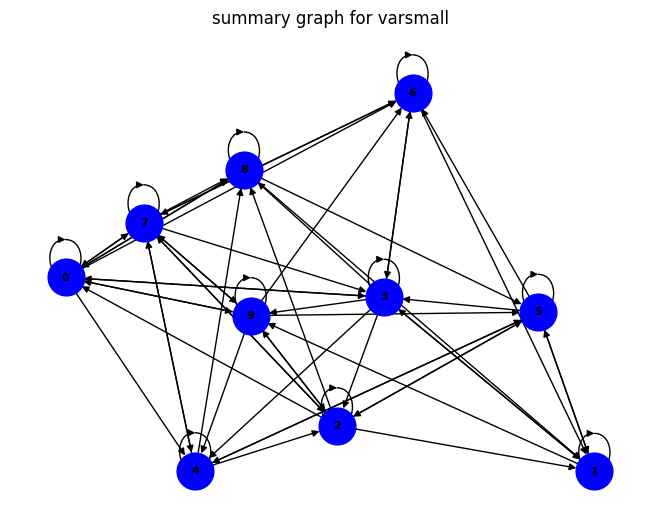

In [23]:
nx.draw(summary_graph, with_labels=True, node_size=700, node_color="blue", font_size=8, font_color="black", font_weight="bold")
plt.title("summary graph for varsmall")
plt.show()

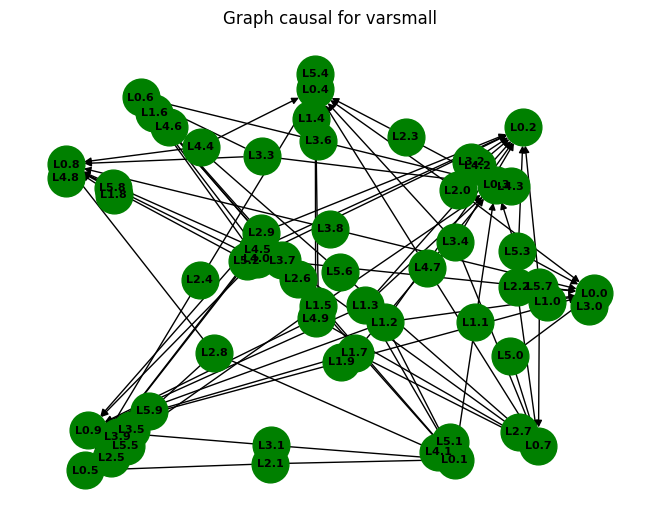

In [24]:
nx.draw(ground_truth_graph, with_labels=True, node_size=700, node_color="green", font_size=8, font_color="black", font_weight="bold")
plt.title("Graph causal for varsmall")
plt.show()

In [41]:
def creation_data_frame(dataset_name,filename,df):
    df, var_names, causes_attributes_dict, lagged_causes_attributes_dict,summary_graph,ground_truth_graph=open_dataset_and_ground_truth(dataset_name,filename)
    dict={}
    total_columns=len(df.columns)
    for target in var_names:
        selected=apply_Rrelieff(df,2,target)
        ground_truth_causes = causes_attributes_dict[target]
        dict_metrics=compute_stats_selected(total_columns,selected,ground_truth_causes,None,selection_mode="variable")
        dict[target]=[dict_metrics['precision'],dict_metrics['recall'],dict_metrics['f1-score'],dict_metrics['TP'],dict_metrics['FP'],dict_metrics['FN'],dict_metrics['TN']]
    data=pd.DataFrame.from_dict(dict,columns=['precision', 'recall', 'f1-score','TP','FP','FN','TN'], orient='index')
    return data
    

In [46]:
data1=creation_data_frame("VARSmall/returns",'data_0.csv',df2)

DiGraph with 60 nodes and 100 edges
DiGraph with 10 nodes and 60 edges


In [48]:
data1

,precision,recall,f1-score,TP,FP,FN,TN
0,0.5,0.166667,0.250000,1,1,5,3
1,0.0,0.000000,NaN,0,2,6,2
2,1.0,0.333333,0.500000,2,0,4,4
3,0.5,0.166667,0.250000,1,1,5,3
4,0.5,0.166667,0.250000,1,1,5,3
5,0.0,0.000000,NaN,0,2,6,2
6,0.5,0.166667,0.250000,1,1,5,3
7,1.0,0.166667,0.285714,1,0,5,4
8,0.5,0.166667,0.250000,1,1,5,3
9,0.0,0.000000,NaN,0,2,6,2


In [47]:
data1.describe()

,precision,recall,f1-score,TP,FP,FN,TN
count,10.000000,10.000000,7.000000,10.000000,10.000000,10.000000,10.000000
mean,0.450000,0.133333,0.290816,0.800000,1.100000,5.200000,2.900000
std,0.368932,0.105409,0.093197,0.632456,0.737865,0.632456,0.737865
min,0.000000,0.000000,0.250000,0.000000,0.000000,4.000000,2.000000
25%,0.125000,0.041667,0.250000,0.250000,1.000000,5.000000,2.250000
50%,0.500000,0.166667,0.250000,1.000000,1.000000,5.000000,3.000000
75%,0.500000,0.166667,0.267857,1.000000,1.750000,5.750000,3.000000
max,1.000000,0.333333,0.500000,2.000000,2.000000,6.000000,4.000000


In [29]:
import random
target=random.choice(var_names)
selected=apply_Rrelieff(df2,2,target)
ground_truth_causes = causes_attributes_dict[target]
total_columns=len(df2.columns)

In [37]:
selected

['0', '3']

In [38]:
print(f'Pour la colonne target: "{target}" on obtient les performances suivantes pour le jeu de données varsmall ')
compute_stats_selected(total_columns,selected,ground_truth_causes,None,selection_mode="variable")

Pour la colonne target: "8" on obtient les performances suivantes pour le jeu de données varsmall 


{'FS_size': 2,
 'precision': 1.0,
 'recall': 0.3333333333333333,
 'TP': 2,
 'FP': 0,
 'FN': 4,
 'TN': 4,
 'f1-score': 0.5}

In [39]:
target2=random.choice(var_names)
selected=apply_Rrelieff(df2,5,target2)
ground_truth_causes = causes_attributes_dict[target2]
print(f'Pour la colonne target: "{target2}" on obtient les performances suivantes pour le jeu de données varsmall ')
compute_stats_selected(total_columns,selected,ground_truth_causes,None,selection_mode="variable")

Pour la colonne target: "5" on obtient les performances suivantes pour le jeu de données varsmall 


{'FS_size': 4,
 'precision': 0.5,
 'recall': 0.3333333333333333,
 'TP': 2,
 'FP': 2,
 'FN': 4,
 'TN': 2,
 'f1-score': 0.4}

# Visualisation pour varsmall

In [40]:
Y1,X1,Z1=[],[],[]
target="2"
ground_truth_causes = causes_attributes_dict[target]

n_feature=0 #nombre de feature de la fonction rrelieff
for i in range(0,10):
    selected=apply_Rrelieff(df2,n_feature,target)
    dict_metrics=compute_stats_selected(total_columns,selected,ground_truth_causes,None,selection_mode="variable")
    Y1.append(dict_metrics['precision'])
    X1.append(n_feature)
    Z1.append(dict_metrics['recall'])
    n_feature+=1


Pour la target "2"


Text(0.5, 1.0, ' Evolution of precision and recall based on the number of features of varsmall')

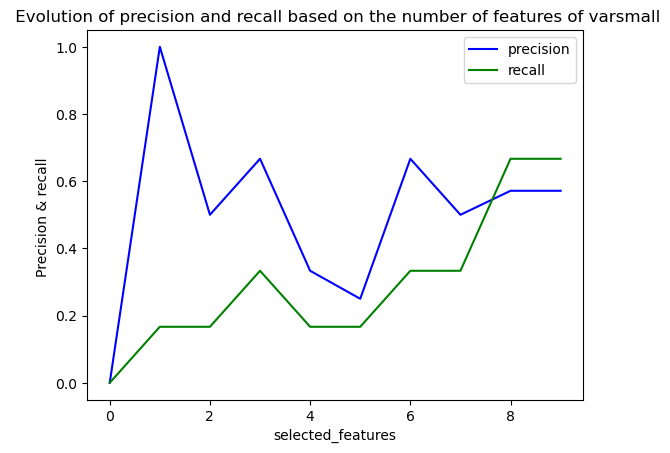

In [41]:
print(f'Pour la target "{target}"')
plt.plot(X1,Y1,'b',label='precision')
plt.plot(X1,Z1,'g',label='recall')
plt.legend()
plt.xlabel('selected_features')
plt.ylabel('Precision & recall ')
plt.title(' Evolution of precision and recall based on the number of features of varsmall')

## Application pour le dataset fmri

In [32]:
data_path3= '/home/amine/ensea/chonomp/data/fMRI_processed_by_Nauta/returns/original'
df3= pd.read_csv(data_path3+'/'+'timeseries1.csv', header=0)

In [33]:
df3

,0,1,2,3,4
0,-1.68690,-1.284100,-0.67603,-2.560100,-1.054200
1,-0.73027,-0.554860,-2.55430,-0.526340,1.100900
2,-1.26200,-0.781840,-0.73326,-0.898060,0.088593
3,2.70640,-2.376600,-0.93296,-0.095345,-2.008700
4,3.44830,0.052548,1.37280,-1.478200,-0.976370
...,...,...,...,...,...
195,1.43010,1.220100,1.02450,2.063700,3.284400
196,4.87120,1.945500,-1.91280,3.255900,4.053000
197,1.30350,0.489110,-0.40256,1.088400,1.705600
198,-3.06360,-1.509400,-1.98910,0.632670,-0.053229


In [34]:
dataset_name= "fMRI_processed_by_Nauta/returns/original"
filename = 'timeseries1.csv'



# Appeler la fonction avec les paramètres nécessaires
print(open_dataset_and_ground_truth(dataset_name, filename))
df, var_names, causes_attributes_dict, lagged_causes_attributes_dict,summary_graph,ground_truth_graph=open_dataset_and_ground_truth(dataset_name,filename)

DiGraph with 10 nodes and 10 edges
DiGraph with 5 nodes and 10 edges
(            0         1         2         3         4
0   -0.678524 -0.556295 -0.299887 -1.173443 -0.437786
1   -0.293738 -0.240375 -1.133090 -0.241252  0.457178
2   -0.507616 -0.338707 -0.325274 -0.411633  0.036790
3    1.088598 -1.029587 -0.413861 -0.043702 -0.834169
4    1.387013  0.022765  0.608978 -0.677545 -0.405465
..        ...       ...       ...       ...       ...
195  0.575230  0.528570  0.454471  0.945913  1.363937
196  1.959348  0.842827 -0.848520  1.492368  1.683120
197  0.524308  0.211892 -0.178575  0.498877  0.708297
198 -1.232276 -0.653899 -0.882367  0.289989 -0.022106
199 -1.016479 -0.066663  0.241383 -1.684191 -1.309787

[200 rows x 5 columns], ['0', '1', '2', '3', '4'], defaultdict(<class 'list'>, {'0': ['0', '1', '4'], '1': ['1', '2'], '2': ['2', '3'], '3': ['3', '4'], '4': ['4']}), defaultdict(<class 'list'>, {'0': [('0', '1'), ('1', '1'), ('4', '1')], '1': [('1', '1'), ('2', '1')], '2': [('2',

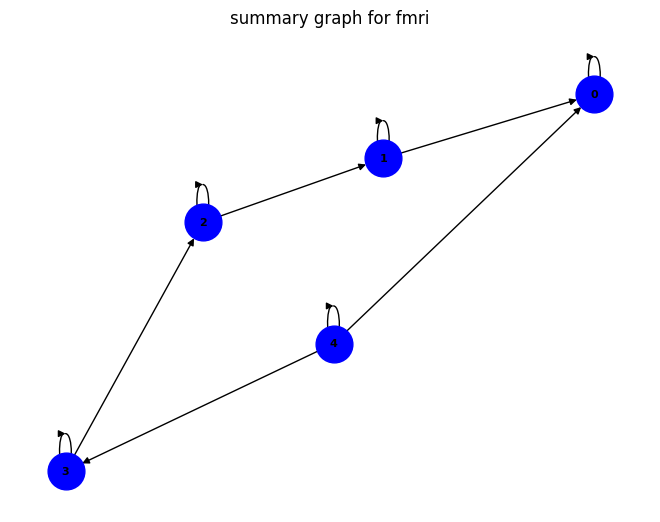

In [35]:
nx.draw(summary_graph, with_labels=True, node_size=700, node_color="blue", font_size=8, font_color="black", font_weight="bold")
plt.title("summary graph for fmri")
plt.show()

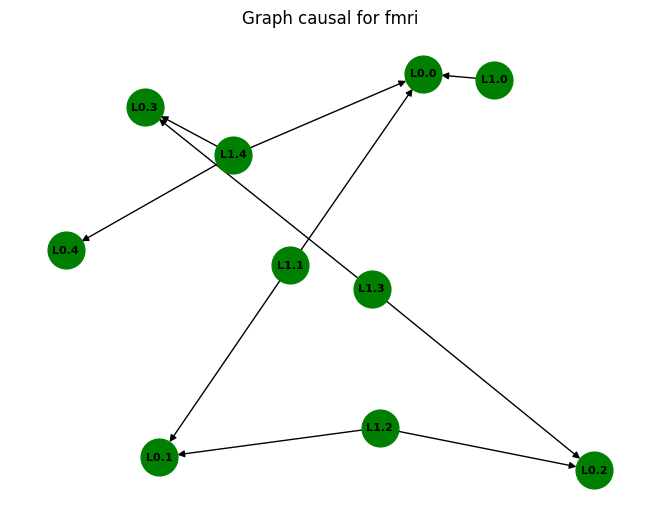

In [36]:
nx.draw(ground_truth_graph, with_labels=True, node_size=700, node_color="green", font_size=8, font_color="black", font_weight="bold")
plt.title("Graph causal for fmri")
plt.show()

In [49]:

data2=creation_data_frame("fMRI_processed_by_Nauta/returns/original",'timeseries1.csv',df3)

DiGraph with 10 nodes and 10 edges
DiGraph with 5 nodes and 10 edges


In [51]:
data2

,precision,recall,f1-score,TP,FP,FN,TN
0,0.0,0.0,NaN,0,1,3,1
1,0.0,0.0,NaN,0,2,2,1
2,0.0,0.0,NaN,0,2,2,1
3,0.5,0.5,0.5,1,1,1,2
4,0.0,0.0,NaN,0,2,1,2


In [50]:
data2.describe()

,precision,recall,f1-score,TP,FP,FN,TN
count,5.000000,5.000000,1.0,5.000000,5.000000,5.00000,5.000000
mean,0.100000,0.100000,0.5,0.200000,1.600000,1.80000,1.400000
std,0.223607,0.223607,NaN,0.447214,0.547723,0.83666,0.547723
min,0.000000,0.000000,0.5,0.000000,1.000000,1.00000,1.000000
25%,0.000000,0.000000,0.5,0.000000,1.000000,1.00000,1.000000
50%,0.000000,0.000000,0.5,0.000000,2.000000,2.00000,1.000000
75%,0.000000,0.000000,0.5,0.000000,2.000000,2.00000,2.000000
max,0.500000,0.500000,0.5,1.000000,2.000000,3.00000,2.000000


In [30]:
import random 
target=random.choice(var_names)
selected=apply_Rrelieff(df3,5,target)
ground_truth_causes = causes_attributes_dict[target]
total_columns=len(df3.columns)

In [31]:
print(f'Pour la colonne target: "{target}" on obtient les performances suivantes pour le jeu de données fMri ')
compute_stats_selected(total_columns,selected,ground_truth_causes,None,selection_mode="variable")

Pour la colonne target: "4" on obtient les performances suivantes pour le jeu de données fMri 


{'FS_size': 3,
 'precision': 0.3333333333333333,
 'recall': 1.0,
 'TP': 1,
 'FP': 2,
 'FN': 0,
 'TN': 2,
 'f1-score': 0.5}

In [32]:
target2=random.choice(var_names)
selected=apply_Rrelieff(df3,5,target2)
ground_truth_causes = causes_attributes_dict[target2]
print(f'Pour la colonne target: "{target2}" on obtient les performances suivantes pour le jeu de données fMri ')
compute_stats_selected(total_columns,selected,ground_truth_causes,None,selection_mode="variable")

Pour la colonne target: "2" on obtient les performances suivantes pour le jeu de données fMri 


{'FS_size': 4,
 'precision': 0.5,
 'recall': 1.0,
 'TP': 2,
 'FP': 2,
 'FN': 0,
 'TN': 1,
 'f1-score': 0.6666666666666666}

# Visualisation des donnees pour le jeu de donnees fmri

In [54]:
Y2,X2,Z2=[],[],[]
target="4"
ground_truth_causes = causes_attributes_dict[target]
n_feature=0 #nombre de feature de la fonction rrelieff
for i in range(0,10):
    selected=apply_Rrelieff(df3,n_feature,target)
    dict_metrics=compute_stats_selected(total_columns,selected,ground_truth_causes,None,selection_mode="variable")
    Y2.append(dict_metrics['precision'])
    X2.append(n_feature)
    Z2.append(dict_metrics['recall'])
    n_feature+=1
    


Pour la target "4"


Text(0.5, 1.0, ' Evolution of precision and recall based on the number of features of fmri')

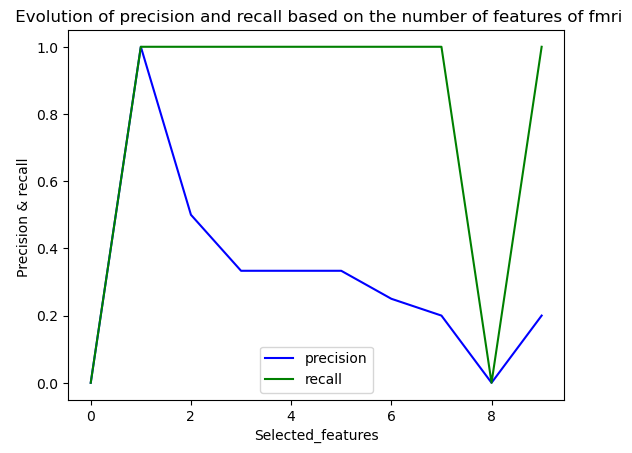

In [55]:
print(f'Pour la target "{target}"')
plt.plot(X2,Y2,'b',label='precision')
plt.plot(X2,Z2,'g',label='recall')
plt.legend()
plt.xlabel('Selected_features')
plt.ylabel('Precision & recall ')
plt.title(' Evolution of precision and recall based on the number of features of fmri')